In [93]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [94]:
# import dataframe
df = pandas.read_csv('DataFinal.csv', sep=";", index_col="Дата", decimal=".")
N_COLUMNS = len(df.columns)
N_ROWS = len(df.index)
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Средняя цена авокадо в США (в долларах),Общее количество проданных авокадо (в фунтах),"Количество запросов ""Здоровая еда""","Количество запросов по слову ""Авокадо""",Температура (отклонение от средней)
Дата,,,,,
31.01.2015,1.365046,318085209.6,70.50,67.00,0.90
28.02.2015,1.326944,362637599.2,63.25,61.75,0.63
31.03.2015,1.361981,418583069.8,63.40,60.20,0.67
30.04.2015,1.383449,344144395.2,63.75,62.00,0.97
31.05.2015,1.344685,483784044.8,62.40,65.60,0.80
30.06.2015,1.399074,381826743.7,58.00,65.50,0.82
31.07.2015,1.409444,356701872.6,60.50,65.75,0.88
31.08.2015,1.444481,419244814.8,55.40,61.40,1.22
30.09.2015,1.449144,329218833.1,57.75,50.75,0.99


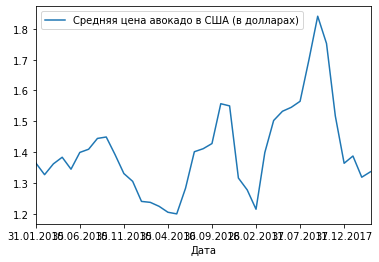

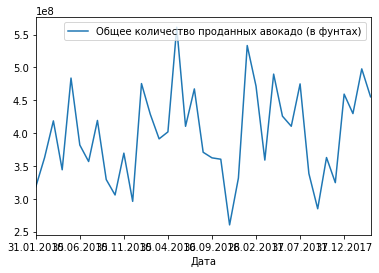

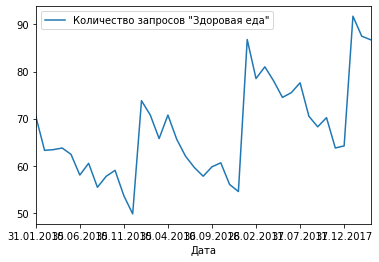

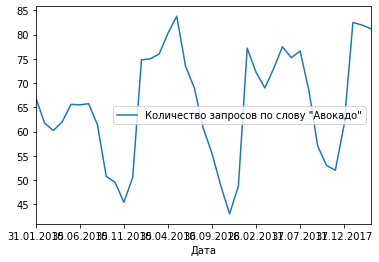

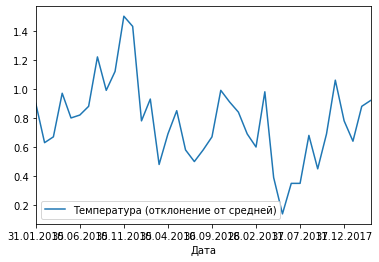

In [95]:
df.plot(y = 'Средняя цена авокадо в США (в долларах)')
df.plot(y = 'Общее количество проданных авокадо (в фунтах)')
df.plot(y = 'Количество запросов "Здоровая еда"')
df.plot(y = 'Количество запросов по слову "Авокадо"')
df.plot(y = 'Температура (отклонение от средней)')

<h1>Grangers causation test</h1>

In [96]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pandas.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=12, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(12)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var for var in variables]
    df.index = [var for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,Средняя цена авокадо в США (в долларах),Общее количество проданных авокадо (в фунтах),"Количество запросов ""Здоровая еда""","Количество запросов по слову ""Авокадо""",Температура (отклонение от средней)
Средняя цена авокадо в США (в долларах),1.0,0.0,0.0,0.0,0.0000
Общее количество проданных авокадо (в фунтах),0.0,1.0,0.0,0.0,0.0704
"Количество запросов ""Здоровая еда""",0.0,0.0,1.0,0.0,0.0000
"Количество запросов по слову ""Авокадо""",0.0,0.0,0.0,1.0,0.0000
Температура (отклонение от средней),0.0,0.0,0.0,0.0,1.0000


<h1>Differencing data</h1>

In [97]:
df_st = pandas.DataFrame()
df_st = df
df_st = df - df.shift(12)
df_st = df_st.dropna()
df_st = df_st - df_st.shift(1)
df_st = df_st.dropna()

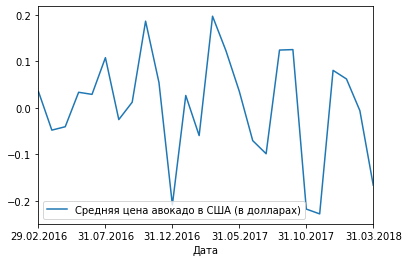

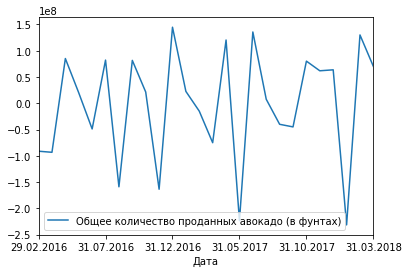

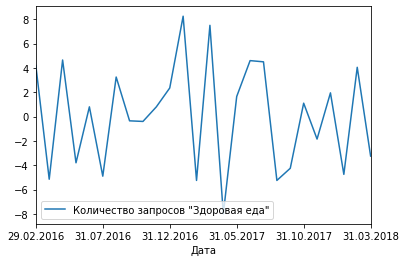

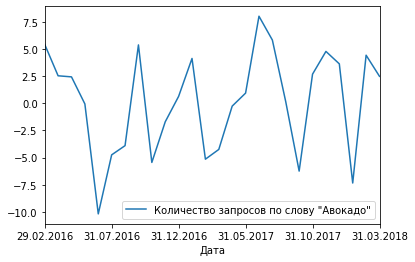

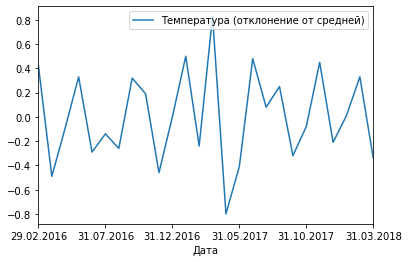

In [98]:
df_st.plot(y = 'Средняя цена авокадо в США (в долларах)')
df_st.plot(y = 'Общее количество проданных авокадо (в фунтах)')
df_st.plot(y = 'Количество запросов "Здоровая еда"')
df_st.plot(y = 'Количество запросов по слову "Авокадо"')
df_st.plot(y = 'Температура (отклонение от средней)')
df_st = df_st.rename(columns = {'Средняя цена авокадо в США (в долларах)': 'avg_price', 'Общее количество проданных авокадо (в фунтах)': 'total_sold',
         'Количество запросов "Здоровая еда"': 'search_food', 'Количество запросов по слову "Авокадо"': 'search_avc',
         'Температура (отклонение от средней)': 'tmp'})

<h1>Augmented Dickey Fuller test</h1>

In [99]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pandas.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [100]:
adf_test(df_st.iloc[:, 0])

Results of Dickey-Fuller Test:
Test Statistic                 -5.122591
p-value                         0.000013
#Lags Used                      1.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [101]:
adf_test(df_st.iloc[:, 1])

Results of Dickey-Fuller Test:
Test Statistic                 -5.376734
p-value                         0.000004
#Lags Used                      2.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [102]:
adf_test(df_st.iloc[:, 2])

Results of Dickey-Fuller Test:
Test Statistic                -8.617957e+00
p-value                        6.216120e-14
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64


In [103]:
adf_test(df_st.iloc[:, 3])

Results of Dickey-Fuller Test:
Test Statistic                 -3.827488
p-value                         0.002638
#Lags Used                      2.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [104]:
adf_test(df_st.iloc[:, 4])

Results of Dickey-Fuller Test:
Test Statistic                 -4.906318
p-value                         0.000034
#Lags Used                      3.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


<h1>Kwiatkowski-Phillips-Schmidt-Shin test</h1>

In [105]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pandas.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [106]:
kpss_test(df_st.iloc[:, 0])

Results of KPSS Test:
Test Statistic           0.302831
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [107]:
kpss_test(df_st.iloc[:, 1])

Results of KPSS Test:
Test Statistic           0.339824
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [108]:
kpss_test(df_st.iloc[:, 2])

Results of KPSS Test:
Test Statistic           0.17884
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [109]:
kpss_test(df_st.iloc[:, 3])

Results of KPSS Test:
Test Statistic           0.210216
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [110]:
kpss_test(df_st.iloc[:, 4])

Results of KPSS Test:
Test Statistic           0.225463
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


D:\ImportantThings\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [111]:
model = VAR(df_st, freq='M')

In [112]:
lags = model.select_order(12)
lags.summary()

,AIC,BIC,FPE,HQIC
0,36.27,36.50,5.672e+15,36.25
1,34.72,36.09,1.608e+15,34.59
2,-27.12,-24.61,2.596e-11,-27.35
3,-128.7,-125.1,-1.038e-55*,-129.1
4,-139.9,-135.1,-1.677e-64,-140.3
5,-141.1,-135.2,-1.808e-67,-141.7
6,-144.3,-137.2,-6.987e-71,-144.9
7,-147.8*,-139.5*,-2.774e-74,-148.5*
8,-147.0,-137.6,-9.844e-76,-147.8
9,-141.8,-131.3,-3.204e-75,-142.8


In [113]:
results = model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, Mar, 2020
Time:                     14:07:54
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    36.9140
Nobs:                     23.0000    HQIC:                   33.9577
Log likelihood:          -462.269    FPE:                1.05905e+15
AIC:                      32.9644    Det(Omega_mle):     7.55499e+13
--------------------------------------------------------------------
Results for equation avg_price
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.009237         0.023576            0.392           0.695
L1.avg_price           0.030961         0.296841            0.104           0.917
L1.total_sold         -0.000000         0.000000    

In [114]:
dw = durbin_watson(results.resid)

for col, val in zip(df.columns, dw):
    print(col, ':', round(val, 2))

Средняя цена авокадо в США (в долларах) : 1.3
Общее количество проданных авокадо (в фунтах) : 1.54
Количество запросов "Здоровая еда" : 2.08
Количество запросов по слову "Авокадо" : 1.79
Температура (отклонение от средней) : 1.96


In [115]:
abg = acorr_breusch_godfrey(results, nlags = 1)

ValueError: all the input arrays must have same number of dimensions